In [39]:
#libraries/
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [40]:
#read the dataset
df = pd.read_csv(r'data/kag_risk_factors_cervical_cancer.csv')
df.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [41]:
#replace '?' with NaN in the dataframe
df = df.replace('?', np.NaN)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [43]:
#count the number of nan values
print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV               

In [44]:
#delete 2 columns in the dataframe because they have mostly nan values
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)
#convert numeric values
df = df.apply(pd.to_numeric, errors='coerce')

In [34]:
#To see how many rows and columns are there in the data frame
df.shape

(858, 34)

In [45]:
#how to get a summary of data frame
df.describe(include = 'all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


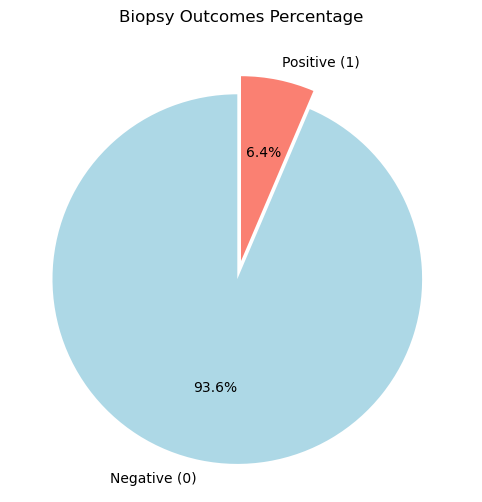

In [48]:
# Count the occurrences of each unique value in the 'Biopsy' column
biopsy_counts = df['Biopsy'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
biopsy_counts.plot.pie(
    autopct='%1.1f%%', 
    labels=['Negative (0)', 'Positive (1)'], 
    colors=['lightblue', 'salmon'], 
    startangle=90,
    explode=[0.1, 0]  # Slightly "explode" the first slice for emphasis
)
plt.title('Biopsy Outcomes Percentage')
plt.ylabel('')  # Removes the default y-label
plt.show()


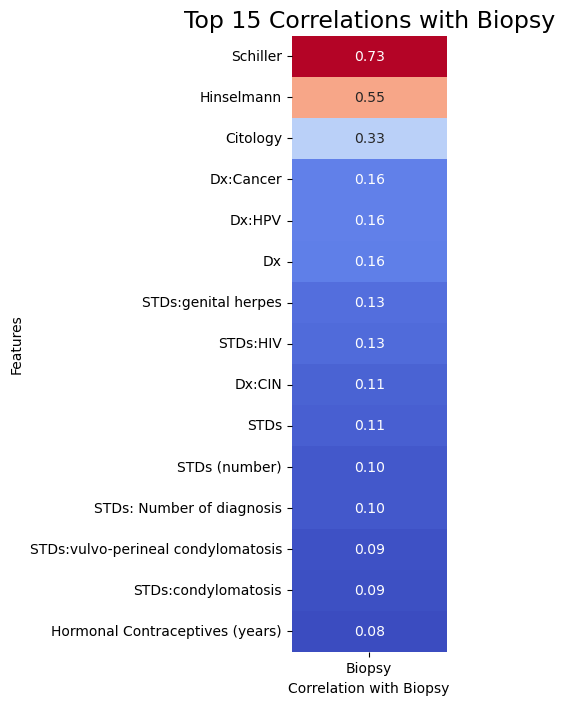

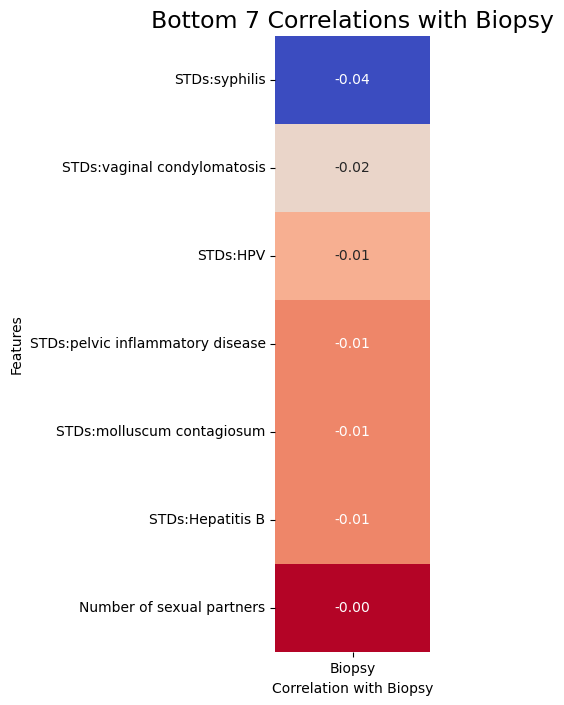

In [65]:
correlation_matrix = df.corr()

biopsy_corr = correlation_matrix['Biopsy'].drop('Biopsy').sort_values(ascending=False)

# Get the top 10 correlations
top_10_corr = biopsy_corr.head(15)

# Create a heatmap for the top 10 correlations
plt.figure(figsize=(2, 8))
sns.heatmap(
    top_10_corr.to_frame(),  
    annot=True,             
    cmap='coolwarm',        
    cbar=False,             
    fmt=".2f"               #
)

plt.title("Top 15 Correlations with Biopsy",fontsize=17)
plt.ylabel("Features")
plt.xlabel("Correlation with Biopsy")
plt.show()

biopsy_corr = correlation_matrix['Biopsy'].drop('Biopsy').sort_values(ascending=True)

# Get the top 10 correlations
top_10_corr = biopsy_corr.head(7)

# Create a heatmap for the bottom 7 correlations
plt.figure(figsize=(2, 8))
sns.heatmap(
    top_10_corr.to_frame(),  
    annot=True,             
    cmap='coolwarm',        
    cbar=False,             
    fmt=".2f"              
)

plt.title("Bottom 7 Correlations with Biopsy",fontsize=17)
plt.ylabel("Features")
plt.xlabel("Correlation with Biopsy")
plt.show()



C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18752\1197336016.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


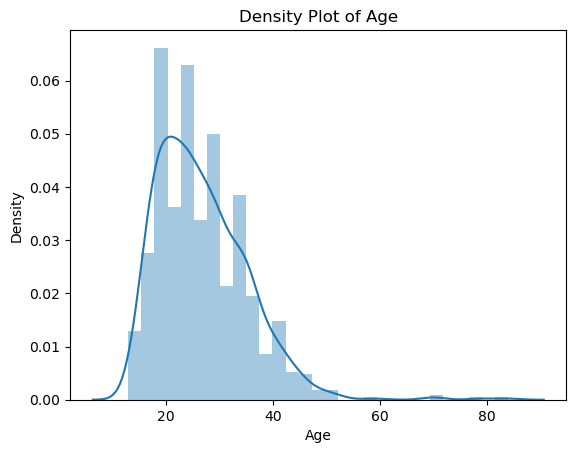

In [62]:
#density plots        
sns.distplot(df['Age'])
plt.title('Density Plot of Age')
plt.show()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18752\1425969005.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(age_biopsy_0, shade=True, color='blue', label='Biopsy = 0')
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18752\1425969005.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(age_biopsy_1, shade=True, color='red', label='Biopsy = 1')
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be re

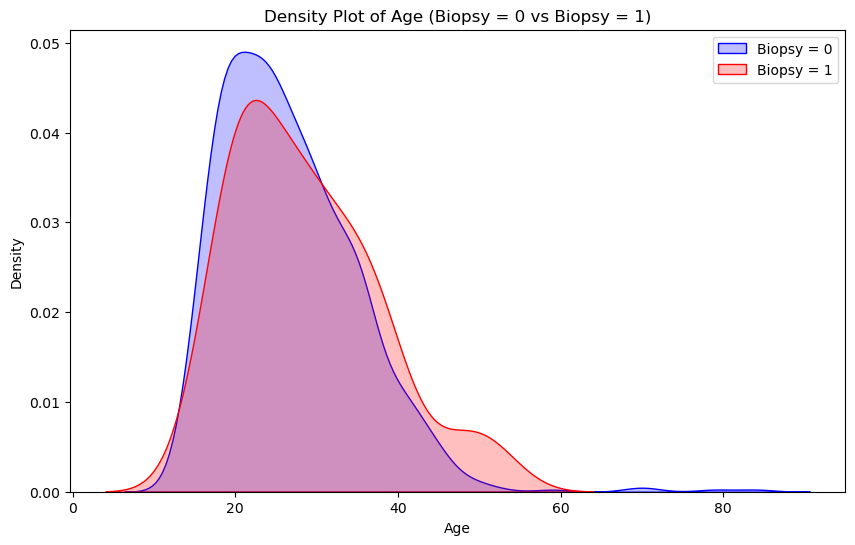

In [ ]:

# Filter the data for Biopsy == 1 and Biopsy == 0
age_biopsy_1 = df[df['Biopsy'] == 1]['Age']
age_biopsy_0 = df[df['Biopsy'] == 0]['Age']

# Plot the density plots
plt.figure(figsize=(10, 6))

sns.kdeplot(age_biopsy_0, shade=True, color='blue', label='Biopsy = 0')
sns.kdeplot(age_biopsy_1, shade=True, color='red', label='Biopsy = 1')


plt.title('Density Plot of Age (Biopsy = 0 vs Biopsy = 1)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

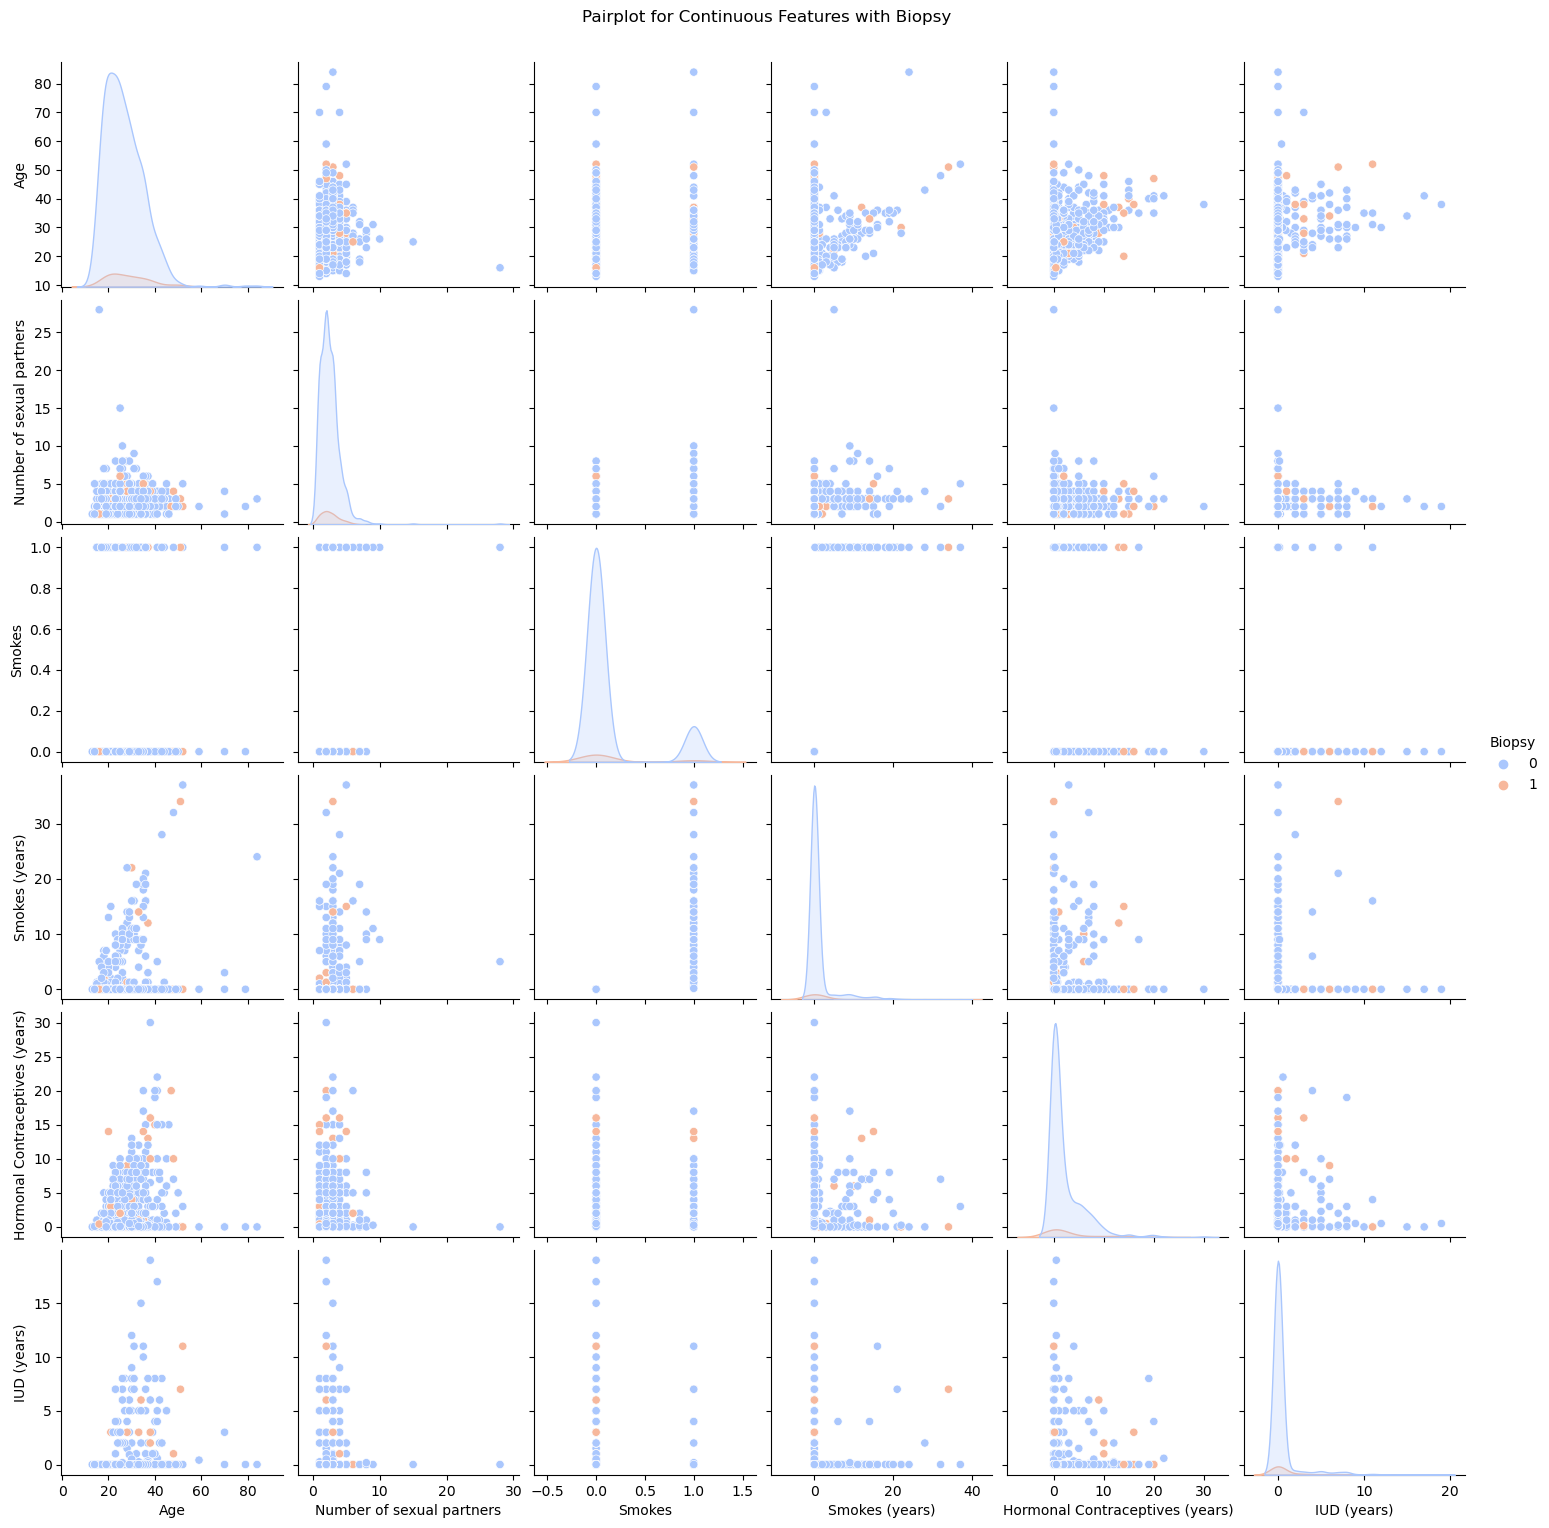

In [67]:
# Select relevant continuous features
continuous_features = ['Age', 'Number of sexual partners', 'Smokes', 'Smokes (years)', 'Hormonal Contraceptives (years)', 'IUD (years)']
df_filtered = df[continuous_features + ['Biopsy']]

# Create pairplot to visualize relationships
sns.pairplot(df_filtered, hue='Biopsy', palette='coolwarm')
plt.suptitle("Pairplot for Continuous Features with Biopsy", y=1.02)
plt.show()

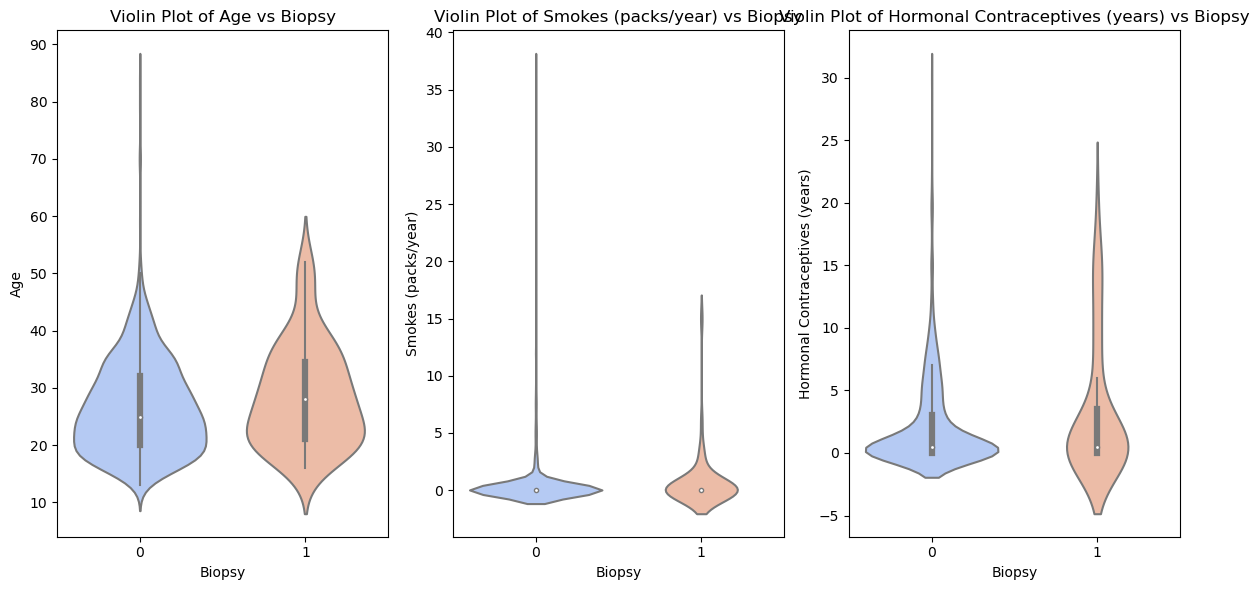

In [69]:
continuous_features = ['Age', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)']
df_filtered = df[continuous_features + ['Biopsy']]

# Create violin plots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(continuous_features):
    plt.subplot(1, 3, i+1)
    sns.violinplot(x='Biopsy', y=feature, data=df_filtered, palette='coolwarm')
    plt.title(f"Violin Plot of {feature} vs Biopsy")
plt.tight_layout()
plt.show()

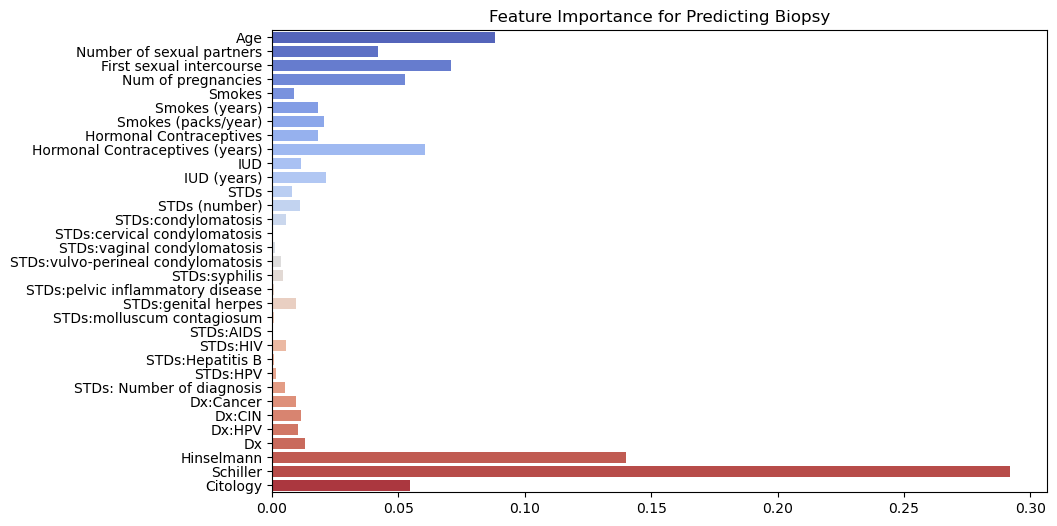

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
# Select features and target
X = df.drop(columns='Biopsy')
y = df['Biopsy']

# Impute missing values with the mean (for numerical features)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

model = RandomForestClassifier()
model.fit(X_imputed, y)

feature_importances = model.feature_importances_
features = X.columns

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette='coolwarm')
plt.title("Feature Importance for Predicting Biopsy")
plt.show()

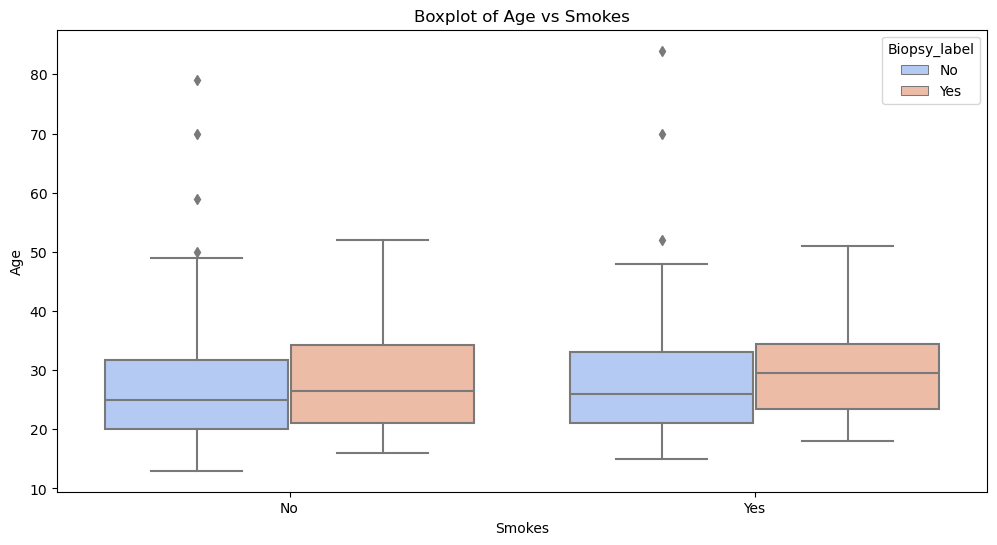

In [85]:
# Convert Biopsy values (0, 1) to 'No' and 'Yes'
df['Biopsy_label'] = df['Biopsy'].map({0: 'No', 1: 'Yes'})

# Create a boxplot for people who smoke vs people who don't smoke, grouped by the Biopsy label
plt.figure(figsize=(12, 6))
sns.boxplot(x='Smokes', y='Age', hue='Biopsy_label', data=df, palette='coolwarm')
plt.title('Boxplot of Age vs Smokes')
plt.xlabel('Smokes')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
# Show the plot
plt.show()

In [86]:
#we want to use 2 different df 
#1st is fill nan values with nan
df1 = df.copy(deep=True)

#2nd first remove IUD (years) nan values completely and then fill nan values with mean. so that we fill less mean values
df2 = df.copy(deep=True)
df2 =df2.dropna(subset=['IUD (years)'])



In [87]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)', 
                'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']


### Filling the missing values of numeric data columns with mean of the column data.
for data in [df1,df2]:
    try:
        for feature in numerical_df:
            print(f"Processing feature: {feature}")
            
            # Sütunu numerik formata dönüştürme (geçersiz değerleri NaN yapar)
            data[feature] = pd.to_numeric(data[feature], errors='coerce')
            
            # Ortalama hesaplama (yalnızca geçerli numerik değerler üzerinde)
            feature_mean = round(data[feature].mean(), 1)
            print(f"{feature} mean: {feature_mean}")
            
            # Eksik değerleri ortalama ile doldurma
            data[feature] = data[feature].fillna(feature_mean)
            
    except Exception as e:
        print(f"An error occurred: {e}")
    
    
    for feature in categorical_df:
        # Convert to numeric, invalid parsing will be set as NaN
        data[feature] = pd.to_numeric(data[feature], errors='coerce').fillna(1.0)

Processing feature: Age
Age mean: 26.8
Processing feature: Number of sexual partners
Number of sexual partners mean: 2.5
Processing feature: First sexual intercourse
First sexual intercourse mean: 17.0
Processing feature: Num of pregnancies
Num of pregnancies mean: 2.3
Processing feature: Smokes (years)
Smokes (years) mean: 1.2
Processing feature: Smokes (packs/year)
Smokes (packs/year) mean: 0.5
Processing feature: Hormonal Contraceptives (years)
Hormonal Contraceptives (years) mean: 2.3
Processing feature: IUD (years)
IUD (years) mean: 0.5
Processing feature: STDs (number)
STDs (number) mean: 0.2
Processing feature: STDs: Time since first diagnosis
An error occurred: 'STDs: Time since first diagnosis'
Processing feature: Age
Age mean: 27.2
Processing feature: Number of sexual partners
Number of sexual partners mean: 2.5
Processing feature: First sexual intercourse
First sexual intercourse mean: 17.1
Processing feature: Num of pregnancies
Num of pregnancies mean: 2.3
Processing featur

In [88]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df1.isnull().sum())
print(" \nCount total NaN at each column in a DataFrame : \n\n", df2.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B           

In [ ]:
#total number of data which has positive values
columns_to_check = ['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']

for column in columns_to_check:
    count_ones = data[column].sum()
    print(f"Number of 1's in column '{column}': {count_ones}")

Number of 1's in column 'Dx:Cancer': 18
Number of 1's in column 'Dx:CIN': 6
Number of 1's in column 'Dx:HPV': 17
Number of 1's in column 'Dx': 20
Number of 1's in column 'Hinselmann': 34
Number of 1's in column 'Schiller': 72
Number of 1's in column 'Citology': 41
Number of 1's in column 'Biopsy': 52


In [90]:
columns_to_check = ['Dx:Cancer', 'Dx:CIN', 'Dx:HPV','Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']

# Check if any of the specified columns have a 1 in each row and count the number of such rows
count_rows_with_1 = (df[columns_to_check] == 1).any(axis=1).sum()

print(f"Number of rows where at least one of the columns contains 1: {count_rows_with_1}")


Number of rows where at least one of the columns contains 1: 119


In [ ]:
df1.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.526807,16.995338,2.277156,0.158508,1.219423,0.453854,0.686480,2.261905,0.233100,...,0.124709,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.642274,2.791883,1.399338,0.365430,4.057886,2.209665,0.464194,3.519112,0.423052,...,0.330581,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
df2.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,...,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000
mean,27.184885,2.524966,17.081781,2.312551,0.152497,1.232654,0.460500,0.642375,2.228967,0.112011,...,0.008097,0.093117,0.024291,0.008097,0.022942,0.026991,0.045884,0.097166,0.055331,0.070175
std,8.712811,1.676260,2.819599,1.416311,0.359744,4.141173,2.296587,0.479625,3.633568,0.315593,...,0.089680,0.313168,0.154057,0.089680,0.149820,0.162165,0.209375,0.296384,0.228779,0.255615
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
#train test split
X = df1.drop(['Biopsy','Biopsy_label'],axis=1)
y = df1['Biopsy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)






In [ ]:
#scaling data
sc=StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


In [101]:
#logistic regression

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(class_weight='balanced')
logr.fit(X_train_sc,y_train)

y_pred = logr.predict(X_test_sc)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('LR')
print(cm)


from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print('score',logr.score(X_test_sc,y_test))

LR
[[156   5]
 [  2   9]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       161
           1       0.64      0.82      0.72        11

    accuracy                           0.96       172
   macro avg       0.82      0.89      0.85       172
weighted avg       0.97      0.96      0.96       172

score 0.9593023255813954


In [102]:
#knn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train_sc,y_train)

y_pred = knn.predict(X_test_sc)

cm = confusion_matrix(y_test,y_pred)
print('KNN')
print(cm)
print(classification_report(y_test, y_pred))

KNN
[[158   3]
 [  5   6]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       161
           1       0.67      0.55      0.60        11

    accuracy                           0.95       172
   macro avg       0.82      0.76      0.79       172
weighted avg       0.95      0.95      0.95       172



In [103]:
#svc
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train_sc,y_train)

y_pred = svc.predict(X_test_sc)

cm = confusion_matrix(y_test,y_pred)
print('SVC')
print(cm)
print(classification_report(y_test, y_pred))


SVC
[[159   2]
 [  6   5]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       161
           1       0.71      0.45      0.56        11

    accuracy                           0.95       172
   macro avg       0.84      0.72      0.77       172
weighted avg       0.95      0.95      0.95       172



In [104]:

#naive bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_sc, y_train)

y_pred = gnb.predict(X_test_sc)

cm = confusion_matrix(y_test,y_pred)
print('GNB')
print(cm)
print(classification_report(y_test, y_pred))

GNB
[[147  14]
 [  1  10]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       161
           1       0.42      0.91      0.57        11

    accuracy                           0.91       172
   macro avg       0.70      0.91      0.76       172
weighted avg       0.96      0.91      0.93       172



In [105]:
#decisionTree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')

dtc.fit(X_train_sc,y_train)
y_pred = dtc.predict(X_test_sc)

cm = confusion_matrix(y_test,y_pred)
print('DTC')
print(cm)
print(classification_report(y_test, y_pred))

DTC
[[157   4]
 [  5   6]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       161
           1       0.60      0.55      0.57        11

    accuracy                           0.95       172
   macro avg       0.78      0.76      0.77       172
weighted avg       0.95      0.95      0.95       172



In [106]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train_sc,y_train)

y_pred = rfc.predict(X_test_sc)
cm = confusion_matrix(y_test,y_pred)
print('RFC')
print(cm)
print(classification_report(y_test, y_pred))

RFC
[[160   1]
 [  8   3]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       161
           1       0.75      0.27      0.40        11

    accuracy                           0.95       172
   macro avg       0.85      0.63      0.69       172
weighted avg       0.94      0.95      0.94       172



In [113]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train_sc, y_train)

y_pred = classifier.predict(X_test_sc)
cm = confusion_matrix(y_test,y_pred)
print('XGBClassifier')
print(cm)
print(classification_report(y_test, y_pred))

XGBClassifier
[[159   2]
 [  6   5]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       161
           1       0.71      0.45      0.56        11

    accuracy                           0.95       172
   macro avg       0.84      0.72      0.77       172
weighted avg       0.95      0.95      0.95       172



In [112]:
# Fit the Gaussian Naive Bayes model (no need for grid search, for simplicity)
gnb = GaussianNB()
gnb.fit(X_train_sc, y_train)

# Get the predicted probabilities (for each class)
y_prob = gnb.predict_proba(X_test_sc)[:, 1]  # Get the probabilities for the positive class (Biopsy=1)

# Adjust the threshold
threshold = 0.7  # You can try different values like 0.3, 0.4, 0.5
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Confusion Matrix and Classification Report with the adjusted threshold
cm = confusion_matrix(y_test, y_pred_adjusted)
print('Adjusted Threshold GNB - Tuned')
print(cm)
print(classification_report(y_test, y_pred_adjusted))

Adjusted Threshold GNB - Tuned
[[147  14]
 [  1  10]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       161
           1       0.42      0.91      0.57        11

    accuracy                           0.91       172
   macro avg       0.70      0.91      0.76       172
weighted avg       0.96      0.91      0.93       172



In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers for optimization
    'penalty': ['l2', 'elasticnet'],  # Regularization penalties
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Initialize the Logistic Regression model
logr = LogisticRegression(class_weight='balanced')

# Set up GridSearchCV with cross-validation
# We change scoring to 'recall' for class 1 (biopsy positive)
grid_search = GridSearchCV(estimator=logr, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_sc, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best recall score (for class 1)
print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation recall (class 1): {best_score:.4f}")

# Use the best model to predict on the test set
best_logr = grid_search.best_estimator_
y_pred = best_logr.predict(X_test_sc)

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print('Best Logistic Regression (Hyperparameter Tuned) Results:')
print(cm)
print(classification_report(y_test, y_pred))

# Output the recall score for class 1 (biopsy positive)
print('Best Model Recall (class 1):', grid_search.best_score_)

Best hyperparameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation recall (class 1): 0.9333
Best Logistic Regression (Hyperparameter Tuned) Results:
[[156   5]
 [  2   9]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       161
           1       0.64      0.82      0.72        11

    accuracy                           0.96       172
   macro avg       0.82      0.89      0.85       172
weighted avg       0.97      0.96      0.96       172

Best Model Recall (class 1): 0.9333333333333332


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dua